# Título (Markdown)

![](https://cosasdedevs.com/media/sections/images/python.png)


![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/300px-Jupyter_logo.svg.png)![](https://colab.research.google.com/img/colab_favicon_256px.png)






## Sección


### Sub sección

- [ ] Nombre del Notebook
- [ ] Guardar cambios Notebook
- [ ] Bloques de Código o Texto
- [ ] Crear/Borrar un Bloque (Atajos de teclado)
- [ ] Texto: Markdown
- [ ] Correr una celda
- [ ] Índice de Colab
- [ ] Ejemplo python
- [ ] Definir una función
- [ ] Dibujar una función
- [ ] Compartir un bloque
- [ ] Compartir un notebook
- [ ] Ejecutar comandos de shell
- [ ] Activar diferentes entornos
- [ ] Capacidad de memoria

# Otro Título

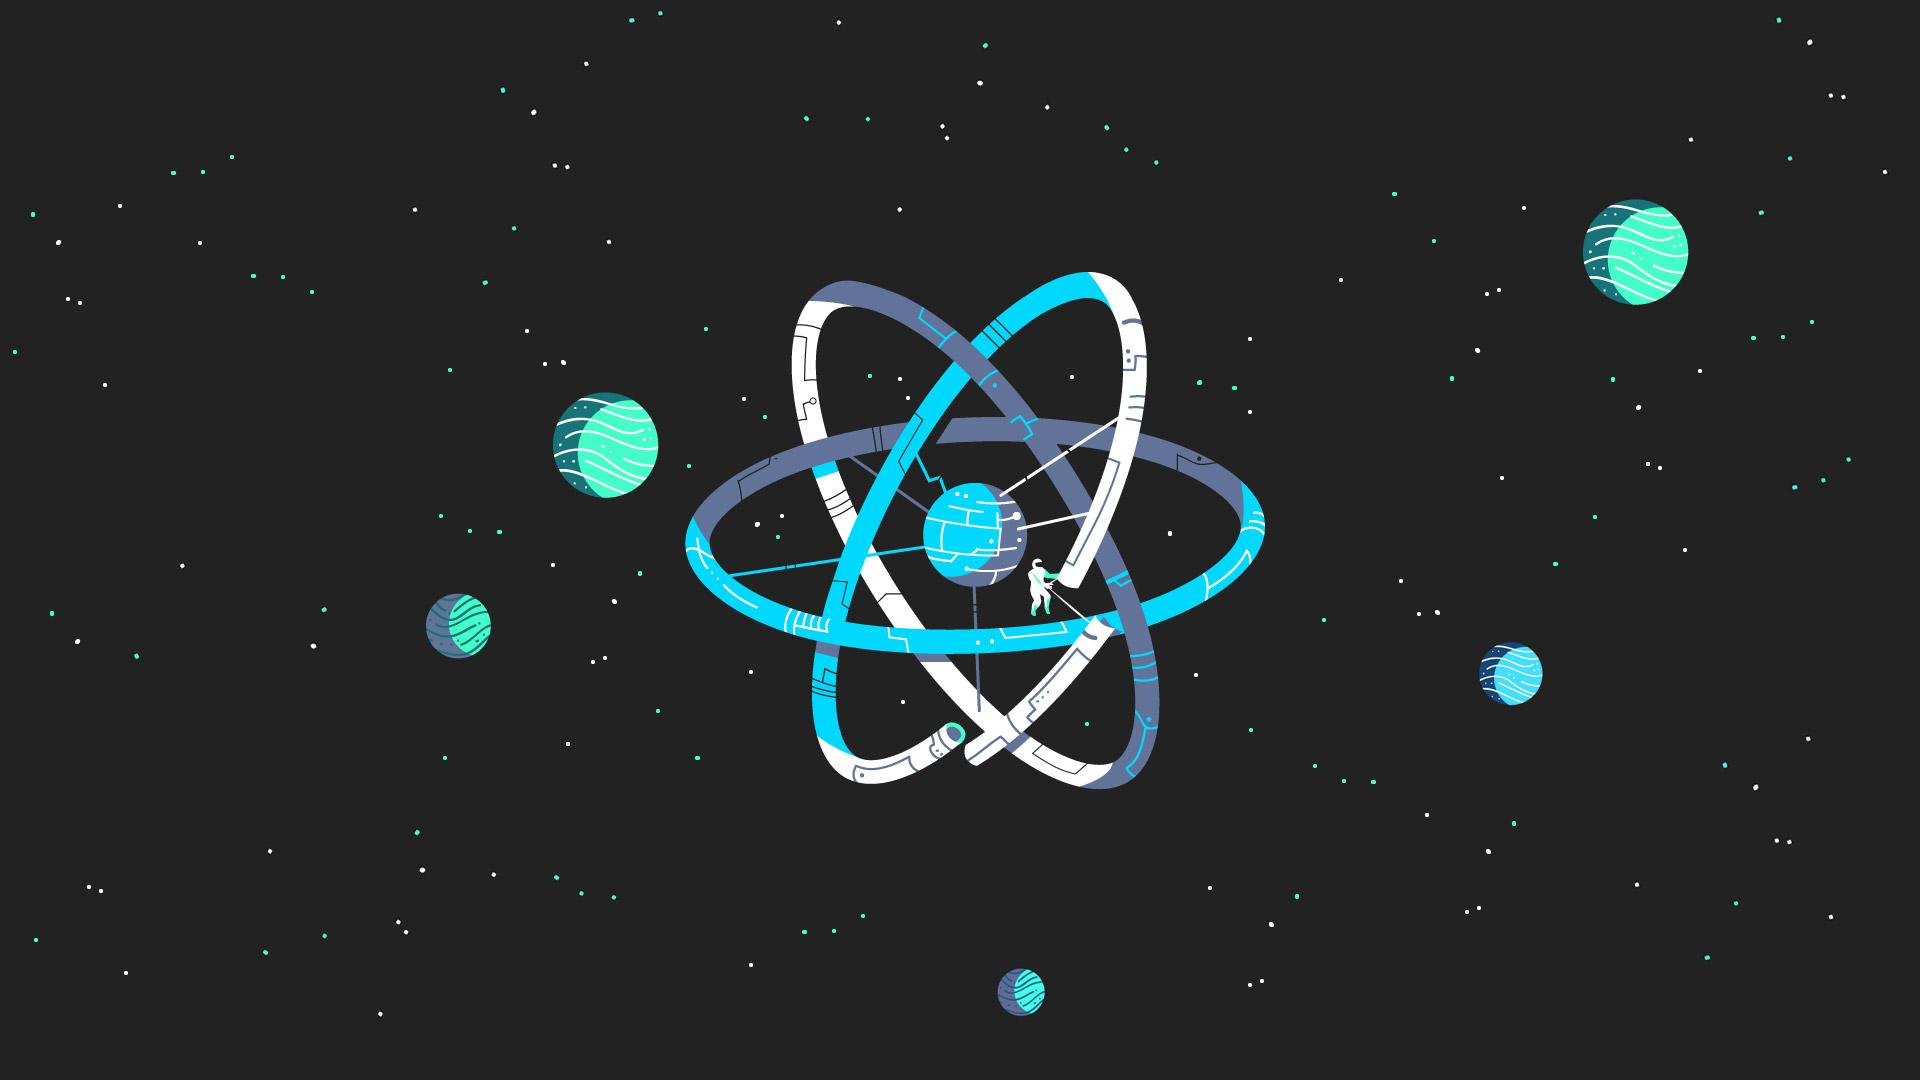

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

Image('wallpaper.jpg')

# Kaggle

![](https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png)
[Kaggle](https://www.kaggle.com/)


# Ejercicio

Explorar el dataset [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) para idear un método que permita identificar el parámetro que mejor determina la calidad del vino rojo.

Usaremos un algoritmo de ML del paquete [Scikit-learn](https://scikit-learn.org/) para clasificar el vino entre alta calidad y baja calidad a partir de algunas características físicas y químicas de cada marca de vino rojo. A partir de esta clasificación identificaremos la importancia de cada característica al momento de predecir la calidad del vino.



In [ ]:
#--- Cargamos los datos contenidos en el dataset

import pandas as pd

data = pd.read_csv('winequality-red.csv')
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
#--- Observamos la cabecera del dataset

data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#--- Verificamos si existen celdas vacias
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#--- Seleccionamos algunas features y el objetivo

keys = ['alcohol','density','pH','citric acid']
y = 'quality'

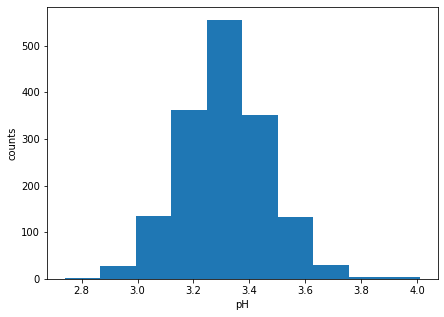

In [ ]:
#--- Visualizando algunos datos
fig = plt.figure(figsize=(7,5))
plt.hist(data['pH'])
plt.xlabel('pH')
plt.ylabel('counts')
plt.show()

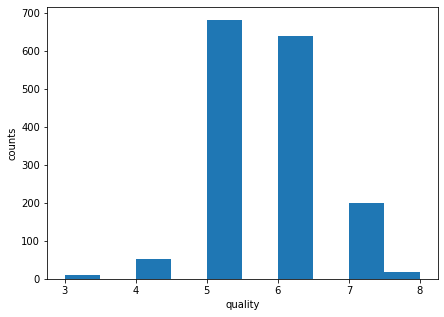

In [ ]:
#--- Visualizando el objetivo
fig = plt.figure(figsize=(7,5))
plt.hist(data['quality'])
plt.xlabel('quality')
plt.ylabel('counts')
plt.show()

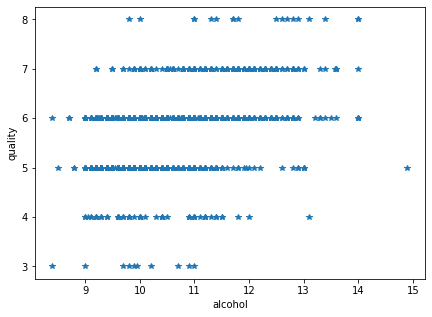

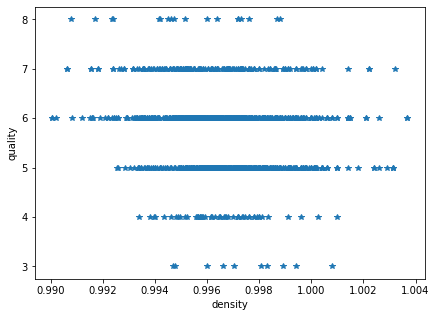

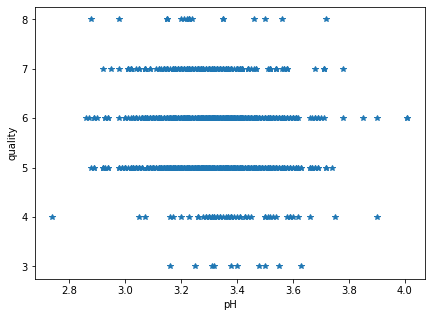

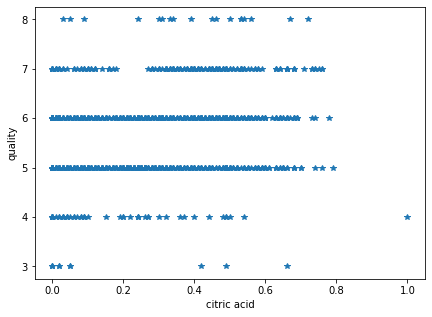

In [ ]:
#--- Clasificación Visual
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],data[y],'*')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

In [ ]:
Y = np.array(data[y], dtype=int)
np.unique(Y,return_counts=True)

Y[Y<6] = 0
Y[Y>=6] = 1

np.unique(Y,return_counts=True)

(array([0, 1]), array([744, 855]))

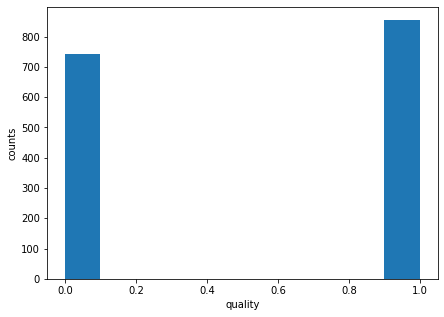

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.ylabel('counts')
plt.xlabel('quality')
plt.show()

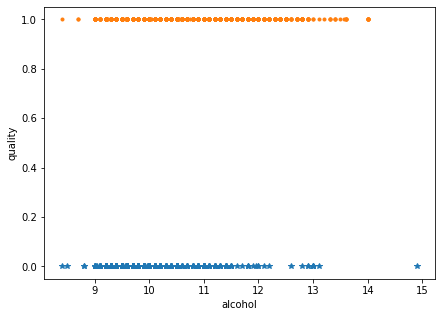

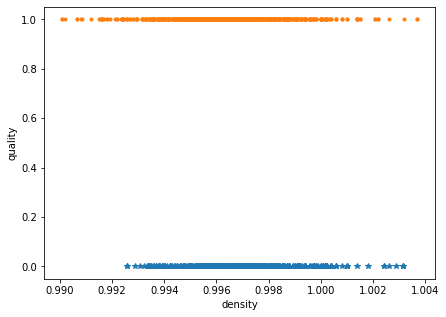

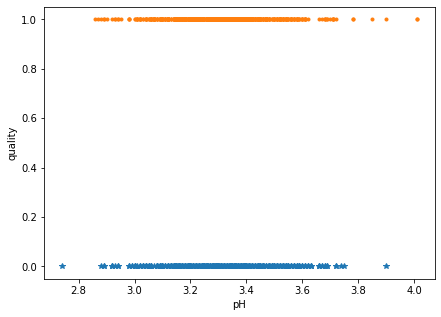

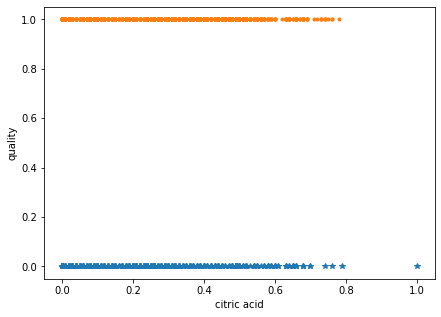

In [ ]:
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k][Y==0],Y[Y==0],'*')
  plt.plot(data[k][Y==1],Y[Y==1],'.')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

In [ ]:
!pip install corner

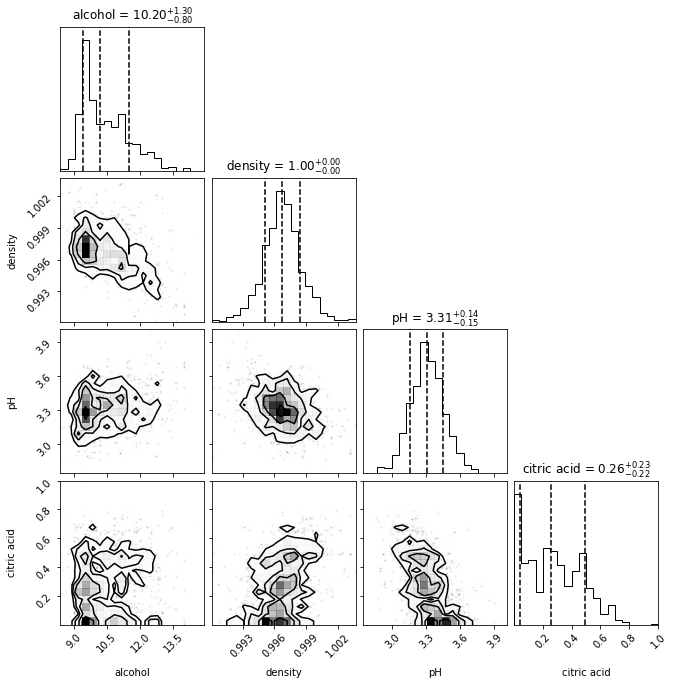

In [ ]:
import corner

figure = corner.corner(data[keys], labels=keys,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [ ]:
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data[keys])

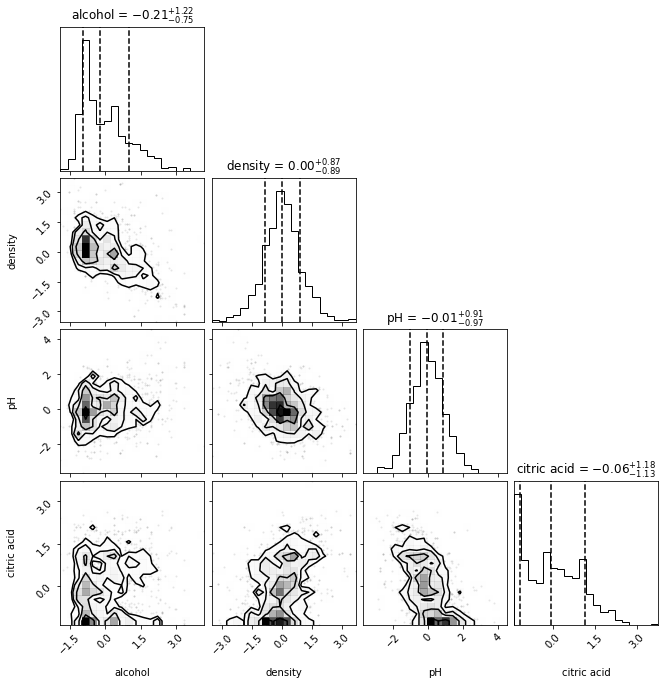

In [ ]:
import corner

figure = corner.corner(data_scaled, labels=keys,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

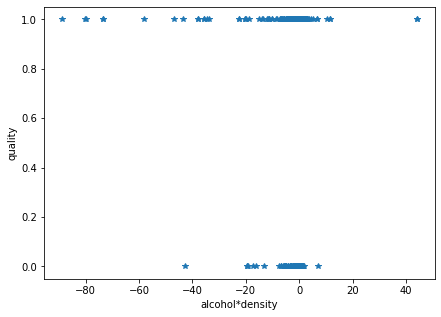

In [ ]:
#--- Probando algunas combinaciones lineales
fig = plt.figure(figsize=(7,5))
plt.plot( (0.9*data_scaled[:,0]/0.9*data_scaled[:,1]) * (0.9*data_scaled[:,2]/0.9*data_scaled[:,0]) ,Y,'*')
plt.xlabel('alcohol*density')
plt.ylabel(y)
plt.show()

# Probando un algoritmo de ML

Usaremos un bosque aleatorio como modelo para resolver nuestro ejercicio de clasificación y así encontrar el feature más determinante en la clasificación de un vino de calidad.

![](https://drive.google.com/uc?id=1HX4tsR5Ip9qHjg88SZGjarjnjWZD1yyw)


![](https://drive.google.com/uc?id=1ZOxIqB_XkMjp5ZQZ_SDdLPfCHG--bLJk)

In [ ]:
#--- Cargamos el método para crear un modelo de Bosque Aleatorio

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#--- Importamos algunos métodos de sklearn

from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=100, max_depth=10)

X_train, X_test, Y_train, Y_test = train_test_split(np.array(data[keys]),Y)

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

In [ ]:
#--- Calculamos la precisión
acc = sum(Y_pred == Y_test)/len(Y_test)
acc

0.7475

In [ ]:
#--- Calculamos la importancia de los parametros
importances = model.feature_importances_
importances

array([0.3722766 , 0.24025617, 0.19666265, 0.19080458])

In [ ]:
#--- Organizamos los parametros de menor a mayor
ii = np.argsort(importances)[::-1]
np.array(keys)[ii]

array(['alcohol', 'density', 'pH', 'citric acid'], dtype='<U11')